In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
data_raw = pd.read_csv("https://gist.githubusercontent.com/fyyying/4aa5b471860321d7b47fd881898162b7/raw/6907bb3a38bfbb6fccf3a8b1edfb90e39714d14f/titanic_dataset.csv")
data_raw.to_csv("../data/raw.csv")
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [99]:
data_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0000,NaN,S
459,460,0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q
725,726,0,3,"Oreskovic, Mr. Luka",male,20.0,0,0,315094,8.6625,NaN,S
399,400,1,2,"Trout, Mrs. William H (Jessie L)",female,28.0,0,0,240929,12.6500,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
506,507,1,2,"Quick, Mrs. Frederick Charles (Jane Richards)",female,33.0,0,2,26360,26.0000,NaN,S
714,715,0,2,"Greenberg, Mr. Samuel",male,52.0,0,0,250647,13.0000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
56,57,1,2,"Rugg, Miss. Emily",female,21.0,0,0,C.A. 31026,10.5000,NaN,S
84,85,1,2,"Ilett, Miss. Bertha",female,17.0,0,0,SO/C 14885,10.5000,NaN,S


In [100]:
df_processed = data_raw.copy()

df_processed = df_processed.drop(['PassengerId'], axis=1)

In [101]:
df_processed.sample(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
667,0,3,"Rommetvedt, Mr. Knud Paust",male,NaN,0,0,312993,7.7750,NaN,S
452,0,1,"Foreman, Mr. Benjamin Laventall",male,30.0,0,0,113051,27.7500,C111,C
507,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S
659,0,1,"Newell, Mr. Arthur Webster",male,58.0,0,2,35273,113.2750,D48,C
743,0,3,"McNamee, Mr. Neal",male,24.0,1,0,376566,16.1000,NaN,S
816,0,3,"Heininen, Miss. Wendla Maria",female,23.0,0,0,STON/O2. 3101290,7.9250,NaN,S
139,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
35,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S
517,0,3,"Ryan, Mr. Patrick",male,NaN,0,0,371110,24.1500,NaN,Q
789,0,1,"Guggenheim, Mr. Benjamin",male,46.0,0,0,PC 17593,79.2000,B82 B84,C


In [102]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [103]:
df_processed.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
df_processed.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [105]:
df_processed.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [106]:
df_processed.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [107]:
df_processed.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [108]:
df_processed.Pclass = df_processed.Pclass.apply(lambda x: 'High' if x == 1 else ('Mid' if x == 2 else 'Economy'))

In [109]:
df_processed.Pclass.describe()

count         891
unique          3
top       Economy
freq          491
Name: Pclass, dtype: object

In [110]:
df_processed.Embarked = df_processed.Embarked.apply(lambda x: 'Cherbourg' if x == 'C' else ('Southampton' if x == 'S' else 'Queenstown'))


In [111]:
df_processed.Embarked.nunique()


3

In [112]:
df_processed = df_processed.drop(['Cabin'], axis=1)

In [113]:
df_processed

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,Economy,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton
1,1,High,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg
2,1,Economy,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton
3,1,High,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton
4,0,Economy,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton
...,...,...,...,...,...,...,...,...,...,...
886,0,Mid,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,Southampton
887,1,High,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,Southampton
888,0,Economy,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,Southampton
889,1,High,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,Cherbourg


In [114]:
df_processed.Pclass = pd.Categorical(df_processed.Pclass)

In [115]:
df_processed.Survived = pd.Categorical(df_processed.Survived)

In [116]:
df_processed.Sex = pd.Categorical(df_processed.Sex)

In [117]:
df_processed.Embarked = pd.Categorical(df_processed.Embarked)

In [118]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       714 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 45.9+ KB


In [119]:
df_processed.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
514,0,Economy,"Coleff, Mr. Satio",male,24.0,0,0,349209,7.4958,Southampton
591,1,High,"Stephenson, Mrs. Walter Bertram (Martha Eustis)",female,52.0,1,0,36947,78.2667,Cherbourg
341,1,High,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,Southampton
461,0,Economy,"Morley, Mr. William",male,34.0,0,0,364506,8.0500,Southampton
400,1,Economy,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,Southampton
596,1,Mid,"Leitch, Miss. Jessie Wills",female,NaN,0,0,248727,33.0000,Southampton
281,0,Economy,"Olsson, Mr. Nils Johan Goransson",male,28.0,0,0,347464,7.8542,Southampton
866,1,Mid,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,Cherbourg
348,1,Economy,"Coutts, Master. William Loch ""William""",male,3.0,1,1,C.A. 37671,15.9000,Southampton
436,0,Economy,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.3750,Southampton


In [120]:
df_processed.to_csv("../data/processed/processed.csv")

In [121]:
df = df_processed.copy()

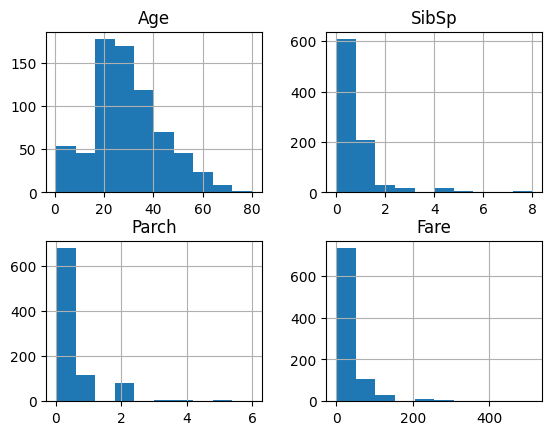

In [122]:
df.hist()
plt.show()

In [123]:
df.describe(include='category')

,Survived,Pclass,Sex,Embarked
count,891,891,891,891
unique,2,3,2,3
top,0,Economy,male,Southampton
freq,549,491,577,644


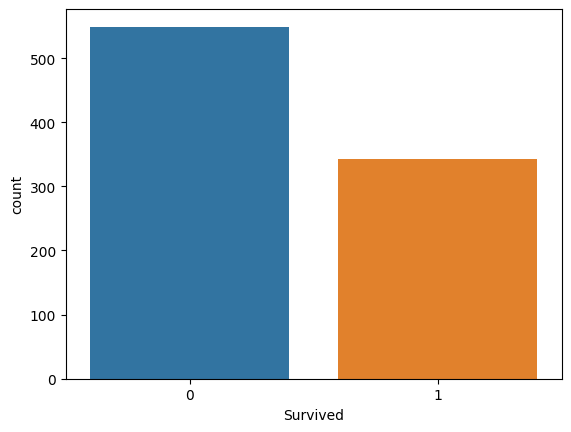

In [126]:
sns.countplot(data=df, x='Survived')
plt.show()

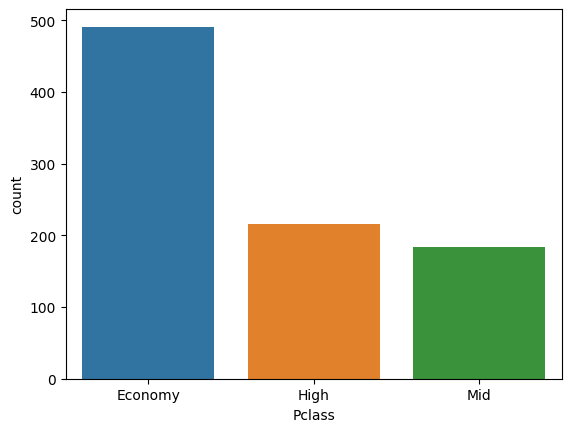

In [130]:
sns.countplot(data=df, x='Pclass')
plt.show()

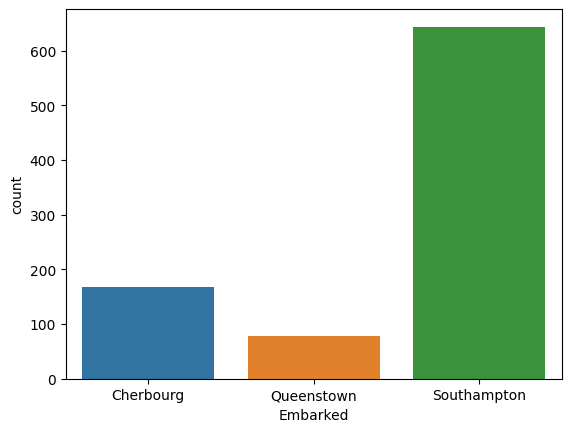

In [131]:
sns.countplot(data=df, x='Embarked')
plt.show()

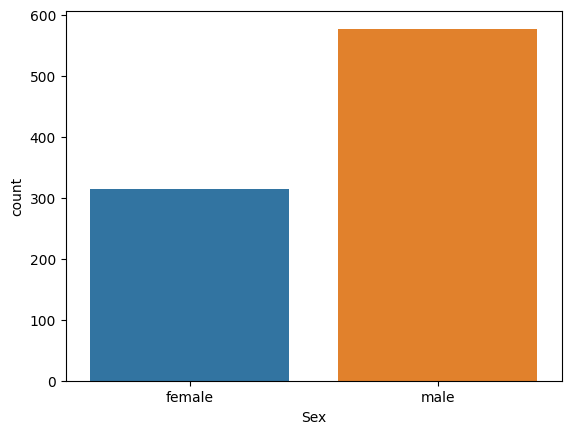

In [132]:
sns.countplot(data=df, x='Sex')
plt.show()

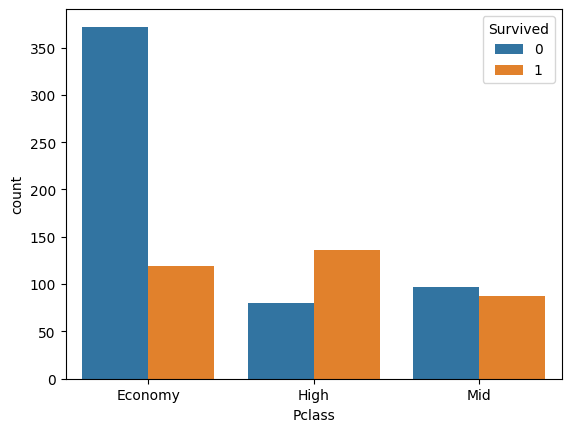

In [133]:
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.show()

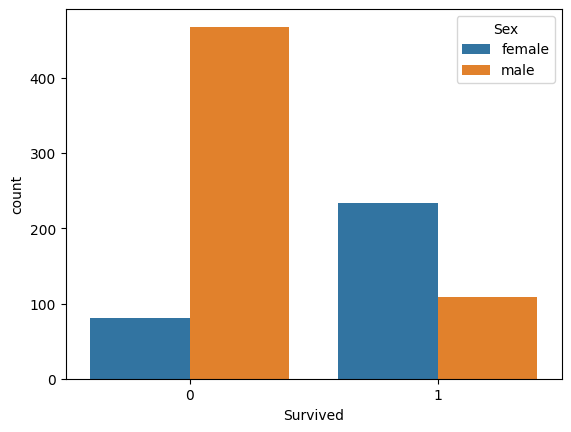

In [135]:
sns.countplot(data=df, x='Survived', hue='Sex')
plt.show()

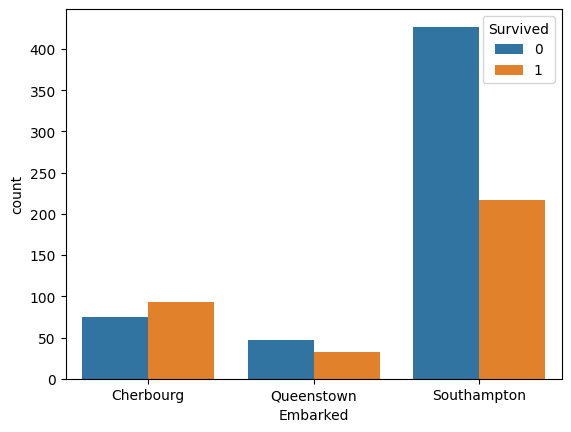

In [136]:
sns.countplot(data=df, x='Embarked', hue='Survived')
plt.show()

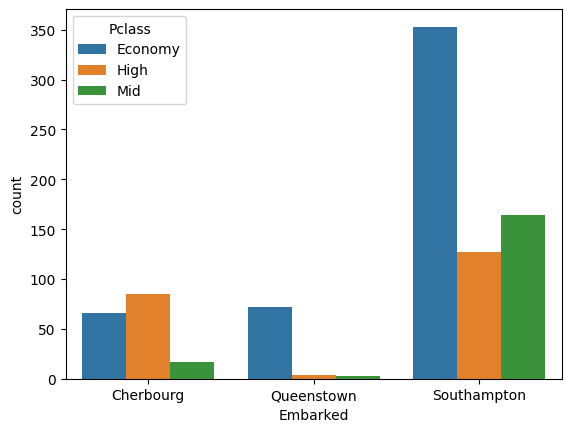

In [137]:
sns.countplot(data=df, x='Embarked', hue='Pclass')
plt.show()

/workspaces/basic_E_D_A/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


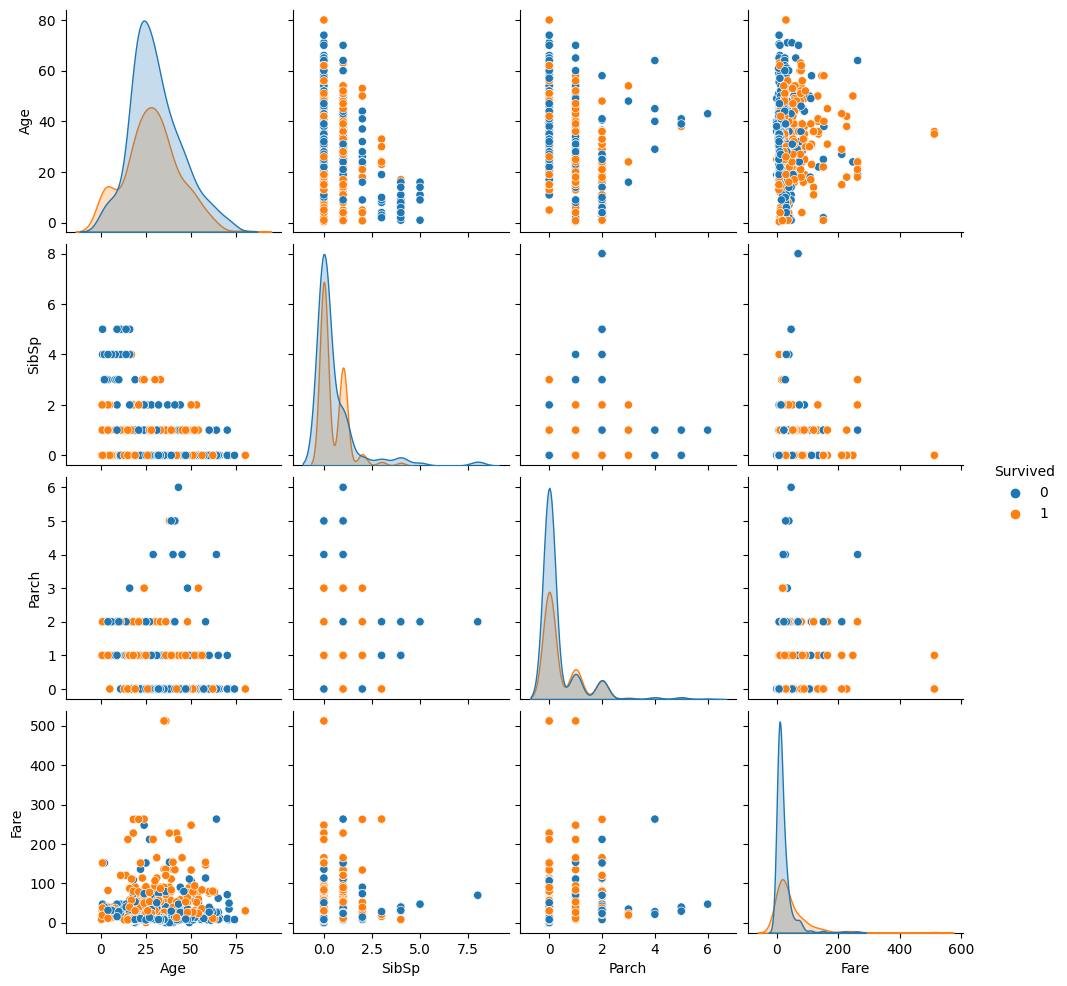

In [138]:
sns.pairplot(data=df, hue='Survived')
plt.show()

In [140]:
df[["Age", "SibSp", "Parch", "Fare"]].corr()

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


In [145]:
df[["Age", "SibSp", "Parch", "Fare"]].corr().style.background_gradient(cmap="Blues")

,Age,SibSp,Parch,Fare
Age,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.308247,1.000000,0.414838,0.159651
Parch,-0.189119,0.414838,1.000000,0.216225
Fare,0.096067,0.159651,0.216225,1.000000


In [146]:
df.Pclass.value_counts(normalize=True)

Pclass
Economy    0.551066
High       0.242424
Mid        0.206510
Name: proportion, dtype: float64

In [147]:
df.Sex.value_counts(normalize=True)

Sex
male      0.647587
female    0.352413
Name: proportion, dtype: float64

In [149]:
df.Survived.value_counts(normalize=True)

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64